In [4]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import pandas_datareader as pdr

%matplotlib inline
import matplotlib.pyplot as plt

import math

Maotai = pd.read_csv('Maotai.csv',index_col='Date')
Maotai.index = pd.to_datetime(Maotai.index)

Yanghe = pd.read_csv('Yanghe.csv',index_col='Date')
Yanghe.index = pd.to_datetime(Yanghe.index)

Wulianggye = pd.read_csv('Wulianggye.csv',index_col='Date')
Wulianggye.index = pd.to_datetime(Wulianggye.index)

Luzhoulj = pd.read_csv('Luzhoulj.csv',index_col='Date')
Luzhoulj.index = pd.to_datetime(Luzhoulj.index)

Hengshuilbg = pd.read_csv('Hengshuilbg.csv',index_col='Date')
Hengshuilbg.index = pd.to_datetime(Hengshuilbg.index)

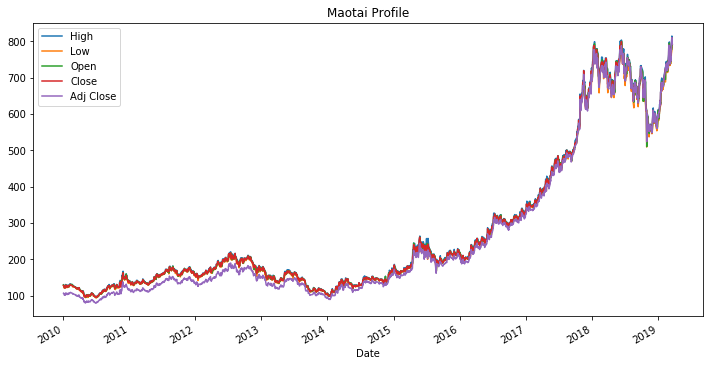

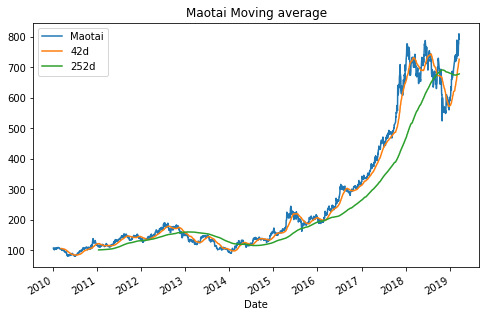

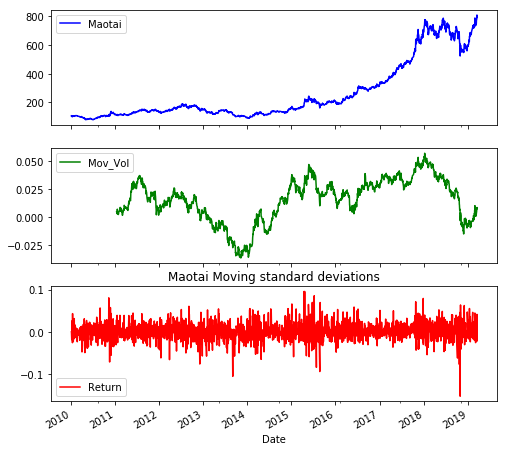

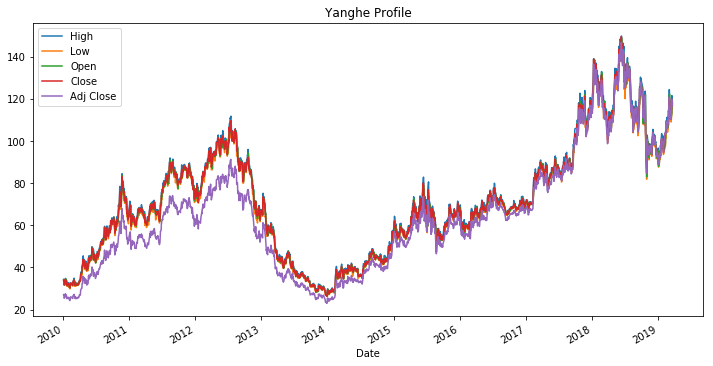

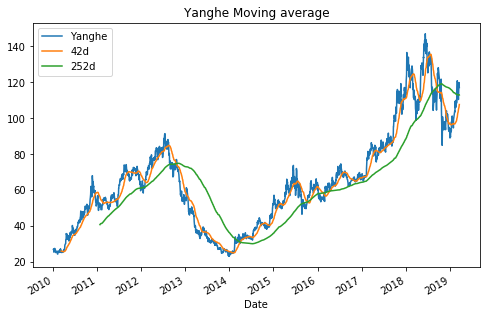

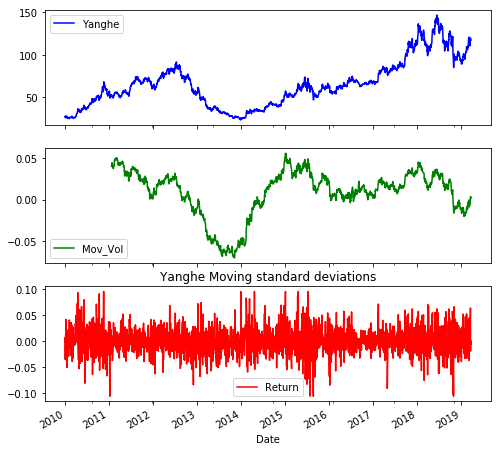

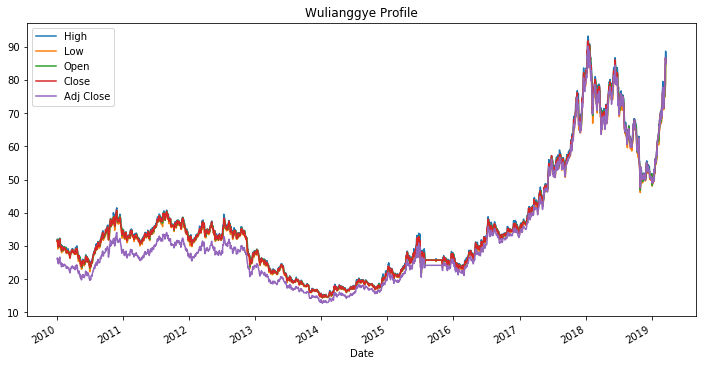

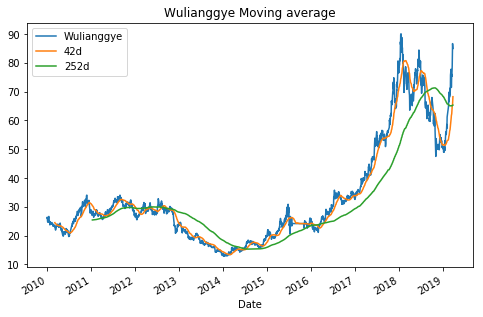

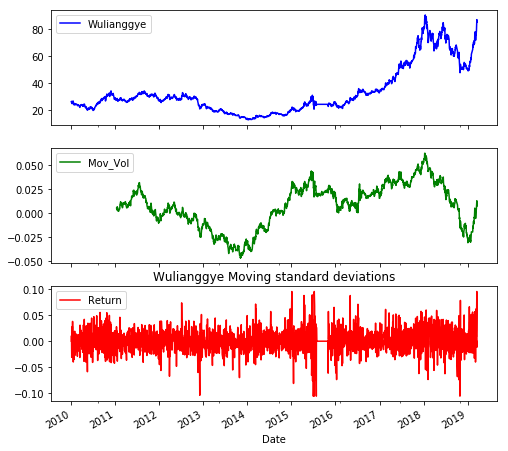

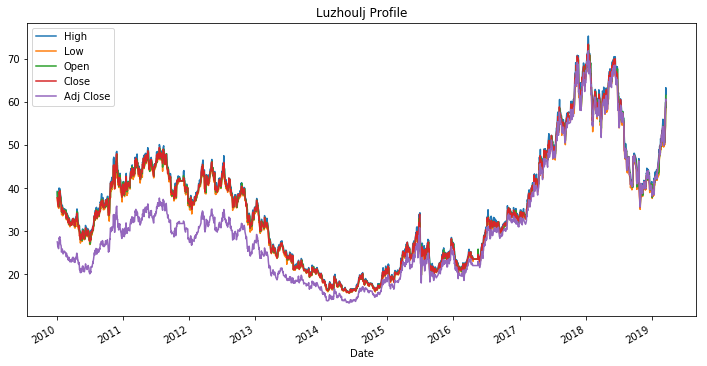

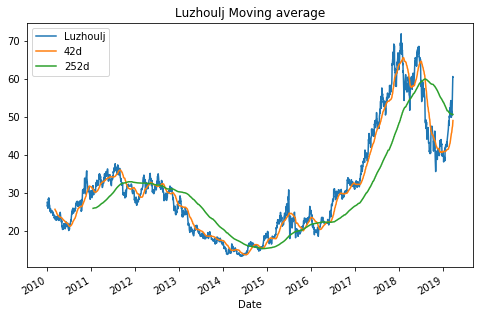

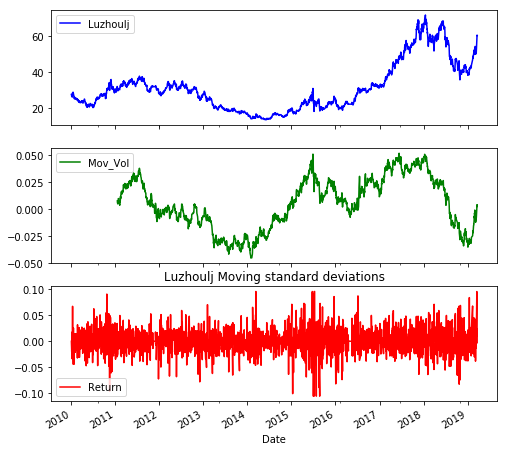

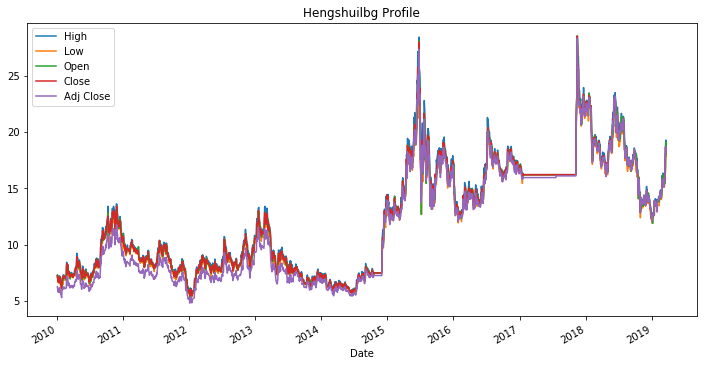

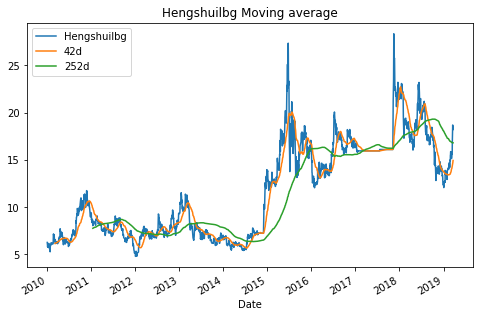

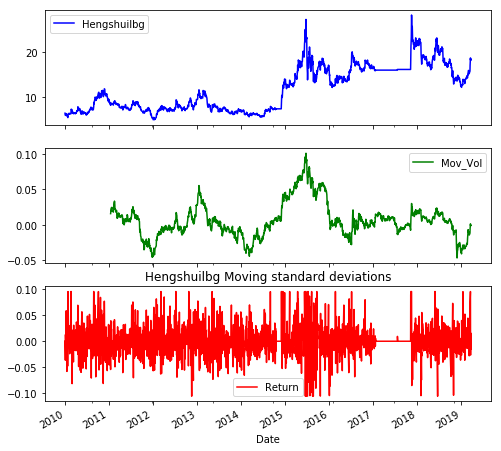

In [12]:
wine_list = [Maotai,Yanghe,Wulianggye,Luzhoulj,Hengshuilbg]
wine_name = ['Maotai','Yanghe','Wulianggye','Luzhoulj','Hengshuilbg']
for j in  range (5):

    
    #概览股价
    plt.rc('figure',figsize=(12,6))  
    wine_list[j][['High','Low','Open','Close','Adj Close']].plot.line()
    plt.title(wine_name[j]+' Profile')
    #plt.savefig(wine_name[j]+"Basic Chart.png")
    
    #波动率变化
    dfMt = pd.DataFrame(wine_list[j]['Adj Close'])
    dfMt.columns = [wine_name[j]]
    dfMt['Return'] = 0.0
    for i in range(1,len(dfMt)):
        dfMt['Return'][i] = np.log(dfMt[wine_name[j]][i] / dfMt[wine_name[j]][i-1])
    
    #移动平均值
    dfMt['42d'] = dfMt[wine_name[j]].rolling(window=42,center=False).mean()
    dfMt['252d'] = dfMt[wine_name[j]].rolling(window=252,center=False).mean()
    dfMt[[wine_name[j],'42d','252d']].plot(figsize=(8,5))
    plt.title(wine_name[j]+' Moving average')
    #plt.savefig(wine_name[j]+"Moving average.png")
    
    #移动历时标准差
    dfMt['Mov_Vol'] = dfMt['Return'].rolling(window=252,center=False).mean() * math.sqrt(252)
    dfMt[[wine_name[j],'Mov_Vol','Return']].plot(subplots=True,style=['b','g','r'],figsize=(8,8))
    plt.title(wine_name[j]+' Moving standard deviations')
    #plt.savefig(wine_name[j]+"Moving standard deviations")
    
    Wine_describe = wine_list[j].describe()
    #Wine_describe.to_csv(wine_name[j]+" describe.csv")

In [14]:
AC = pd.DataFrame(Maotai['Adj Close'])
AC.columns = ['Maotai']
AC['Wuliangye'] = Wulianggye['Adj Close']
AC['Laobaigan'] = Hengshuilbg['Adj Close']
AC['Yanghe'] = Yanghe['Adj Close']
AC['Luzhoulaojiao'] = Luzhoulj['Adj Close']
#AC.to_csv("Adj collect.csv")

In [15]:
ACC = AC.corr()
#ACC.to_csv("Adj corr.csv")

In [16]:
ACD = AC.describe()
#ACD.to_csv("Adj describe.csv")

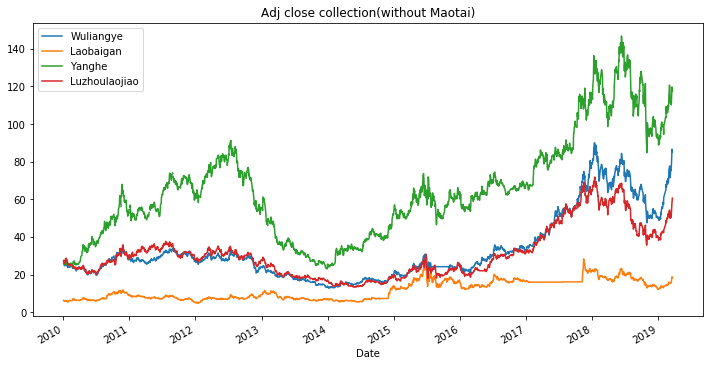

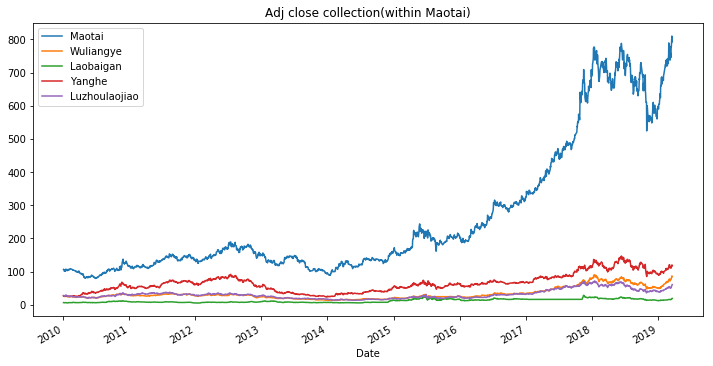

In [18]:
plt.rc('figure',figsize=(12,6))
AC[['Wuliangye','Laobaigan','Yanghe','Luzhoulaojiao']].plot.line()
plt.title("Adj close collection(without Maotai)")
#plt.savefig("Adj close collection(without Maotai)")
AC[['Maotai','Wuliangye','Laobaigan','Yanghe','Luzhoulaojiao']].plot.line()
plt.title("Adj close collection(within Maotai)")
#plt.savefig("Adj close collection(within Maotai)")